# Draw polar plots for all categories

In [1]:
# See this for the list of valid ones https://pastebin.com/NGzvE0Ky
interesting_categories = [
   ('VISp', [175, 185, 205], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISp', [275, 335, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Scnn1a-Tg3-Cre']),
   ('VISp', [375, 390, 400], ['Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Fezf2-CreER', 'Rbp4-Cre_KL100', 'Tlx3-Cre_PL56']),
   ('VISp', [550], ['Ntsr1-Cre_GN220']),
   ('VISp', [175, 185, 195, 200, 225, 275], ['Pvalb-IRES-Cre']),
   ('VISp', [175, 275], ['Vip-IRES-Cre']),
   ('VISp', [265, 285, 350], ['Sst-IRES-Cre']),
   ('VISal', [175, 265], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISal', [275], ['Sst-IRES-Cre']),
   ('VISal', [275, 276, 300, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISal', [365, 375], ['Emx1-IRES-Cre', 'Rbp4-Cre_KL100']),
   ('VISam', [175], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISam', [275, 320, 325, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISam', [375], ['Emx1-IRES-Cre', 'Rbp4-Cre_KL100']),
   ('VISl', [175], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISl', [275, 325, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISl', [375, 400], ['Fezf2-CreER', 'Rbp4-Cre_KL100', 'Tlx3-Cre_PL56 ', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISl', [550, 570, 625], ['Ntsr1-Cre_GN220']),
   ('VISl', [175, 250, 275], ['Vip-IRES-Cre']),
   ('VISl', [250, 275], ['Sst-IRES-Cre']),
   ('VISl', [375], ['Sst-IRES-Cre']),
   ('VISpm', [175], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISpm', [275, 300, 325, 335, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISpm', [550], ['Ntsr1-Cre_GN220']),
   ('VISpm', [175, 275], ['Vip-IRES-Cre']),
   ('VISpm', [275, 300, 325, 350, 375], ['Sst-IRES-Cre']),
   ('VISrl', [175], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISrl', [275, 350], ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']),
   ('VISrl', [375], ['Rbp4-Cre_KL100 ', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']),
   ('VISrl', [375], ['Sst-IRES-Cre'])
]
    
dsi_dg_threshold = 0.5

In [2]:
import os
drive_path = '/media/stephen/Brain20191/allen-brain-observatory/visual-coding-2p/'
if not os.path.isdir(drive_path):
    drive_path = '/media/alihamodi/Brain2019/allen-brain-observatory/visual-coding-2p/'
    
import warnings; warnings.simplefilter('ignore');
from utils.polarplot import *
from utils.polardata import *
from utils.data_wrappers import *
import os
import pandas as pd
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info
from utils.data_wrappers import *
manifest_file = os.path.join(drive_path,'manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

In [3]:
get_one_category_polar_data_cache = {}

In [4]:
def get_avg_cell_polar_in_experiment(boc, ec_id, exp_id, cells):
    """
    Get the polar data for all cells in this experiment, then average them out to get a single polar data.
    """
    in_category_cells = cells[cells.experiment_container_id == ec_id]
    dg_response_filter = get_dg_response_filter_from_saskia()
    filtered_cells = get_filtered_cells(in_category_cells, dg_response_filter)
    filtered_cells = filtered_cells[filtered_cells.dsi_dg > dsi_dg_threshold]
    print ("In this experiment, we have", len(in_category_cells),
           "cells, but after filtering, we have", len(filtered_cells), "cells")
    
    thetas = []
    rs = []
    cell_ids = []
    data_set = boc.get_ophys_experiment_data(exp_id)
    for ii, row in filtered_cells.iterrows():
        cell_specimen_id = row.cell_specimen_id
        pref_tf = row.pref_tf
        one_cell_polar_data_dict = get_avg_normalized_response(
            data_set=data_set,
            cell_specimen_id = cell_specimen_id,
            temporal_frequency=pref_tf)
        if one_cell_polar_data_dict is None:
            continue
        theta, r = convert_polar_dict_to_arrays(one_cell_polar_data_dict)
        thetas.append(theta)
        rs.append(r)
        cell_ids.append(cell_specimen_id)
        
    print ("In this experiment, we have", len(in_category_cells),
           "cells, but after filtering and removing negative mean dffs, we have", len(thetas), "cells")
    if len(thetas) == 0:
        return None, None, None
    agg_theta, agg_r = get_avg_polar(thetas, rs)
    return agg_theta, agg_r, len(thetas)

In [5]:
def get_one_category_polar_data(boc, targeted_structure, imaging_depths, cre_lines):
    cache_key = (targeted_structure, tuple(imaging_depths), tuple(cre_lines))
    if cache_key in get_one_category_polar_data_cache:
        return get_one_category_polar_data_cache[cache_key]
    
    exps = boc.get_ophys_experiments(stimuli=[stim_info.DRIFTING_GRATINGS],
        targeted_structures = [targeted_structure],
        imaging_depths = imaging_depths,
        cre_lines = cre_lines)
    if len(exps) == 0:
        return None, None, None, None
    print ("There are", len(exps), "experiments for ", targeted_structure, imaging_depths, cre_lines)
    
    thetas = []
    rs = []
    total_num_cells = 0
    for exp in exps:
        e_id = exp['id']
        ec_id = exp['experiment_container_id']
        print("Processing experiment", e_id)
        theta, r, num_cells = get_avg_cell_polar_in_experiment(boc, ec_id, e_id, cells)
        if theta is None or len(theta) == 0:
            continue
        thetas.append(theta)
        rs.append(r)
        total_num_cells += num_cells
        
    agg_theta, agg_r = get_avg_polar(thetas, rs)
    
    if len(thetas) == 0:
        agg_theta, agg_r, thetas, rs, total_num_cells= None, None, None, None, None
    
    get_one_category_polar_data_cache[cache_key] = (agg_theta, agg_r, thetas, rs, total_num_cells)
    return get_one_category_polar_data_cache[cache_key]


There are 20 experiments for  VISp [175, 185, 205] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Slc17a7-IRES2-Cre']
Processing experiment 704298735
In this experiment, we have 157 cells, but after filtering, we have 25 cells
In this experiment, we have 157 cells, but after filtering and removing negative mean dffs, we have 25 cells
Processing experiment 545446482
In this experiment, we have 282 cells, but after filtering, we have 35 cells
In this experiment, we have 282 cells, but after filtering and removing negative mean dffs, we have 34 cells
Processing experiment 663485329
In this experiment, we have 243 cells, but after filtering, we have 23 cells
In this experiment, we have 243 cells, but after filtering and removing negative mean dffs, we have 23 cells
Processing experiment 510514474
In this experiment, we have 402 cells, but after filtering, we have 34 cells
In this experiment, we have 402 cells, but after filtering and removing negative mean dffs, we have 34 cells
P

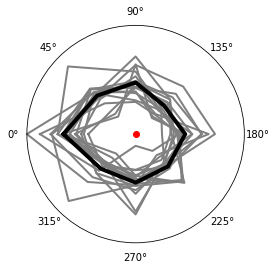

There are 34 experiments for  VISp [275, 335, 350] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Scnn1a-Tg3-Cre']
Processing experiment 510214538
In this experiment, we have 390 cells, but after filtering, we have 119 cells
In this experiment, we have 390 cells, but after filtering and removing negative mean dffs, we have 119 cells
Processing experiment 528402271
In this experiment, we have 265 cells, but after filtering, we have 85 cells
In this experiment, we have 265 cells, but after filtering and removing negative mean dffs, we have 85 cells
Processing experiment 644026238
In this experiment, we have 376 cells, but after filtering, we have 66 cells
In this experiment, we have 376 cells, but after filtering and removing negative mean dffs, we have 66 cells
Processing experiment 503109347
In this experiment, we have 520 cells, but after filtering, we have 133 cells
In this experiment, we have 520 cells, but after filtering and removing negative mean dffs, 

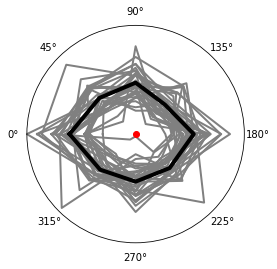

There are 26 experiments for  VISp [375, 390, 400] ['Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Fezf2-CreER', 'Rbp4-Cre_KL100', 'Tlx3-Cre_PL56']
Processing experiment 662033243
In this experiment, we have 192 cells, but after filtering, we have 44 cells
In this experiment, we have 192 cells, but after filtering and removing negative mean dffs, we have 44 cells
Processing experiment 546716391
In this experiment, we have 217 cells, but after filtering, we have 41 cells
In this experiment, we have 217 cells, but after filtering and removing negative mean dffs, we have 41 cells
Processing experiment 649401936
In this experiment, we have 83 cells, but after filtering, we have 25 cells
In this experiment, we have 83 cells, but after filtering and removing negative mean dffs, we have 25 cells
Processing experiment 643645390
In this experiment, we have 180 cells, but after filtering, we have 39 cells
In this experiment, we have 180 cells, but after filtering and removing negative mean dffs, we have

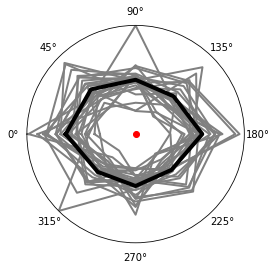

There are 6 experiments for  VISp [550] ['Ntsr1-Cre_GN220']
Processing experiment 665722301
In this experiment, we have 28 cells, but after filtering, we have 3 cells
In this experiment, we have 28 cells, but after filtering and removing negative mean dffs, we have 3 cells
Processing experiment 689388034
In this experiment, we have 214 cells, but after filtering, we have 39 cells
In this experiment, we have 214 cells, but after filtering and removing negative mean dffs, we have 39 cells
Processing experiment 604145810
In this experiment, we have 65 cells, but after filtering, we have 11 cells
In this experiment, we have 65 cells, but after filtering and removing negative mean dffs, we have 11 cells
Processing experiment 603576132
In this experiment, we have 163 cells, but after filtering, we have 41 cells
In this experiment, we have 163 cells, but after filtering and removing negative mean dffs, we have 41 cells
Processing experiment 645086975
In this experiment, we have 69 cells, but 

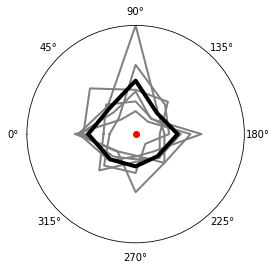

There are 13 experiments for  VISp [175, 185, 195, 200, 225, 275] ['Pvalb-IRES-Cre']
Processing experiment 673171528
In this experiment, we have 17 cells, but after filtering, we have 0 cells
In this experiment, we have 17 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 712178483
In this experiment, we have 12 cells, but after filtering, we have 0 cells
In this experiment, we have 12 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 671618887
In this experiment, we have 28 cells, but after filtering, we have 0 cells
In this experiment, we have 28 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 669861524
In this experiment, we have 22 cells, but after filtering, we have 0 cells
In this experiment, we have 22 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 672206735
In this experiment, we have

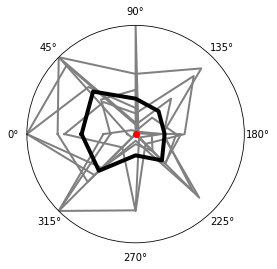

There are 4 experiments for  VISp [265, 285, 350] ['Sst-IRES-Cre']
Processing experiment 576095926
In this experiment, we have 19 cells, but after filtering, we have 2 cells
In this experiment, we have 19 cells, but after filtering and removing negative mean dffs, we have 2 cells
Processing experiment 575939366
In this experiment, we have 11 cells, but after filtering, we have 0 cells
In this experiment, we have 11 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 612044635
In this experiment, we have 27 cells, but after filtering, we have 1 cells
In this experiment, we have 27 cells, but after filtering and removing negative mean dffs, we have 1 cells
Processing experiment 582918858
In this experiment, we have 18 cells, but after filtering, we have 5 cells
In this experiment, we have 18 cells, but after filtering and removing negative mean dffs, we have 5 cells
VISp [265, 285, 350] ['Sst-IRES-Cre'] #Experiments:  3 #Cells: 8


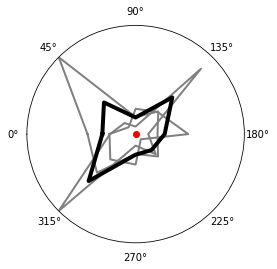

There are 10 experiments for  VISal [175, 265] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']
Processing experiment 605859367
In this experiment, we have 64 cells, but after filtering, we have 8 cells
In this experiment, we have 64 cells, but after filtering and removing negative mean dffs, we have 8 cells
Processing experiment 506773892
In this experiment, we have 142 cells, but after filtering, we have 16 cells
In this experiment, we have 142 cells, but after filtering and removing negative mean dffs, we have 16 cells
Processing experiment 563176332
In this experiment, we have 346 cells, but after filtering, we have 93 cells
In this experiment, we have 346 cells, but after filtering and removing negative mean dffs, we have 93 cells
Processing experiment 562052595
In this experiment, we have 209 cells, but after filtering, we have 38 cells
In this experiment, we have 209 cells, but after filtering and removing negative mean dffs, we have 38 cells
Processing experiment 56089846

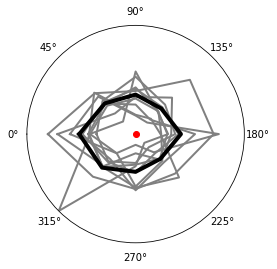

There are 1 experiments for  VISal [275] ['Sst-IRES-Cre']
Processing experiment 589441079
In this experiment, we have 24 cells, but after filtering, we have 3 cells
In this experiment, we have 24 cells, but after filtering and removing negative mean dffs, we have 3 cells
VISal [275] ['Sst-IRES-Cre'] #Experiments:  1 #Cells: 3


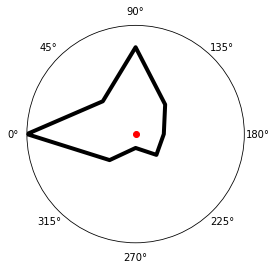

There are 21 experiments for  VISal [275, 276, 300, 350] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']
Processing experiment 510390912
In this experiment, we have 161 cells, but after filtering, we have 22 cells
In this experiment, we have 161 cells, but after filtering and removing negative mean dffs, we have 22 cells
Processing experiment 685816006
In this experiment, we have 47 cells, but after filtering, we have 14 cells
In this experiment, we have 47 cells, but after filtering and removing negative mean dffs, we have 14 cells
Processing experiment 504853580
In this experiment, we have 208 cells, but after filtering, we have 29 cells
In this experiment, we have 208 cells, but after filtering and removing negative mean dffs, we have 29 cells
Processing experiment 548379748
In this experiment, we have 39 cells, but after filtering, we have 7 cells
In this experiment, we have 39 cells, but after filtering and removing negative mean dffs, we have

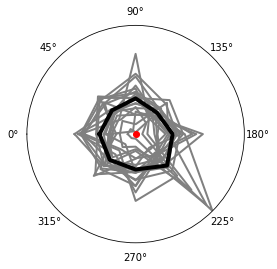

There are 9 experiments for  VISal [365, 375] ['Emx1-IRES-Cre', 'Rbp4-Cre_KL100']
Processing experiment 588483711
In this experiment, we have 51 cells, but after filtering, we have 5 cells
In this experiment, we have 51 cells, but after filtering and removing negative mean dffs, we have 5 cells
Processing experiment 504568756
In this experiment, we have 187 cells, but after filtering, we have 34 cells
In this experiment, we have 187 cells, but after filtering and removing negative mean dffs, we have 34 cells
Processing experiment 573083539
In this experiment, we have 66 cells, but after filtering, we have 11 cells
In this experiment, we have 66 cells, but after filtering and removing negative mean dffs, we have 11 cells
Processing experiment 511440894
In this experiment, we have 101 cells, but after filtering, we have 7 cells
In this experiment, we have 101 cells, but after filtering and removing negative mean dffs, we have 7 cells
Processing experiment 569299884
In this experiment, we

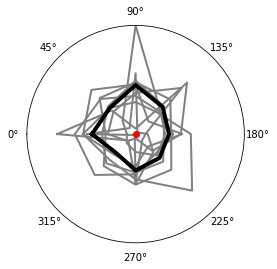

There are 8 experiments for  VISam [175] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']
Processing experiment 565216523
In this experiment, we have 197 cells, but after filtering, we have 13 cells
In this experiment, we have 197 cells, but after filtering and removing negative mean dffs, we have 13 cells
Processing experiment 571177441
In this experiment, we have 164 cells, but after filtering, we have 24 cells
In this experiment, we have 164 cells, but after filtering and removing negative mean dffs, we have 24 cells
Processing experiment 707006626
In this experiment, we have 75 cells, but after filtering, we have 6 cells
In this experiment, we have 75 cells, but after filtering and removing negative mean dffs, we have 6 cells
Processing experiment 557304694
In this experiment, we have 130 cells, but after filtering, we have 5 cells
In this experiment, we have 130 cells, but after filtering and removing negative mean dffs, we have 5 cells
Processing experiment 637669284
In thi

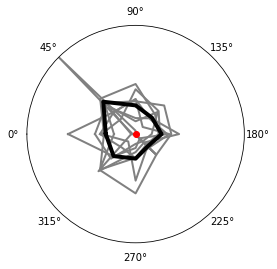

There are 21 experiments for  VISam [275, 320, 325, 350] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']
Processing experiment 556665481
In this experiment, we have 7 cells, but after filtering, we have 0 cells
In this experiment, we have 7 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 712919665
In this experiment, we have 46 cells, but after filtering, we have 1 cells
In this experiment, we have 46 cells, but after filtering and removing negative mean dffs, we have 1 cells
Processing experiment 571103671
In this experiment, we have 195 cells, but after filtering, we have 6 cells
In this experiment, we have 195 cells, but after filtering and removing negative mean dffs, we have 6 cells
Processing experiment 560027980
In this experiment, we have 28 cells, but after filtering, we have 1 cells
In this experiment, we have 28 cells, but after filtering and removing negative mean dffs, we have 1 cells
Processing experiment 

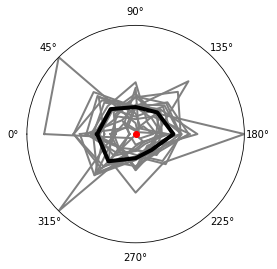

There are 9 experiments for  VISam [375] ['Emx1-IRES-Cre', 'Rbp4-Cre_KL100']
Processing experiment 556353209
In this experiment, we have 37 cells, but after filtering, we have 2 cells
In this experiment, we have 37 cells, but after filtering and removing negative mean dffs, we have 2 cells
Processing experiment 647603932
In this experiment, we have 45 cells, but after filtering, we have 2 cells
In this experiment, we have 45 cells, but after filtering and removing negative mean dffs, we have 2 cells
Processing experiment 601904502
In this experiment, we have 23 cells, but after filtering, we have 4 cells
In this experiment, we have 23 cells, but after filtering and removing negative mean dffs, we have 4 cells
Processing experiment 616779893
In this experiment, we have 21 cells, but after filtering, we have 3 cells
In this experiment, we have 21 cells, but after filtering and removing negative mean dffs, we have 3 cells
Processing experiment 569792817
In this experiment, we have 95 cell

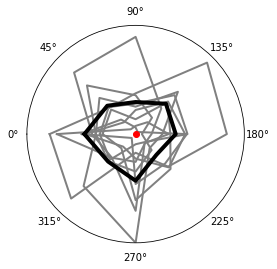

There are 17 experiments for  VISl [175] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']
Processing experiment 564425777
In this experiment, we have 347 cells, but after filtering, we have 66 cells
In this experiment, we have 347 cells, but after filtering and removing negative mean dffs, we have 66 cells
Processing experiment 502793808
In this experiment, we have 263 cells, but after filtering, we have 48 cells
In this experiment, we have 263 cells, but after filtering and removing negative mean dffs, we have 48 cells
Processing experiment 501940850
In this experiment, we have 234 cells, but after filtering, we have 38 cells
In this experiment, we have 234 cells, but after filtering and removing negative mean dffs, we have 38 cells
Processing experiment 560926639
In this experiment, we have 172 cells, but after filtering, we have 22 cells
In this experiment, we have 172 cells, but after filtering and removing negative mean dffs, we have 22 cells
Processing experiment 550455111


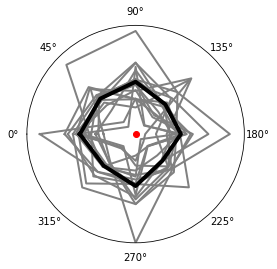

There are 25 experiments for  VISl [275, 325, 350] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']
Processing experiment 653123929
In this experiment, we have 406 cells, but after filtering, we have 83 cells
In this experiment, we have 406 cells, but after filtering and removing negative mean dffs, we have 83 cells
Processing experiment 585035184
In this experiment, we have 148 cells, but after filtering, we have 30 cells
In this experiment, we have 148 cells, but after filtering and removing negative mean dffs, we have 30 cells
Processing experiment 546641574
In this experiment, we have 255 cells, but after filtering, we have 48 cells
In this experiment, we have 255 cells, but after filtering and removing negative mean dffs, we have 48 cells
Processing experiment 507129766
In this experiment, we have 119 cells, but after filtering, we have 8 cells
In this experiment, we have 119 cells, but after filtering and removing negative mean dffs, we have 8

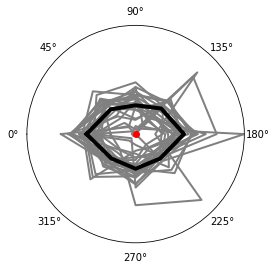

There are 17 experiments for  VISl [375, 400] ['Fezf2-CreER', 'Rbp4-Cre_KL100', 'Tlx3-Cre_PL56 ', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']
Processing experiment 639932847
In this experiment, we have 176 cells, but after filtering, we have 25 cells
In this experiment, we have 176 cells, but after filtering and removing negative mean dffs, we have 25 cells
Processing experiment 612077499
In this experiment, we have 236 cells, but after filtering, we have 28 cells
In this experiment, we have 236 cells, but after filtering and removing negative mean dffs, we have 28 cells
Processing experiment 682051855
In this experiment, we have 150 cells, but after filtering, we have 22 cells
In this experiment, we have 150 cells, but after filtering and removing negative mean dffs, we have 22 cells
Processing experiment 611658482
In this experiment, we have 222 cells, but after filtering, we have 40 cells
In this experiment, we have 222 cells, but after filtering and removin

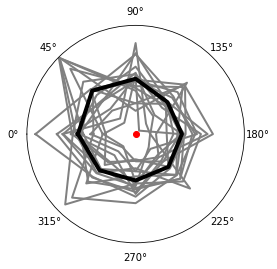

There are 7 experiments for  VISl [550, 570, 625] ['Ntsr1-Cre_GN220']
Processing experiment 605883133
In this experiment, we have 90 cells, but after filtering, we have 10 cells
In this experiment, we have 90 cells, but after filtering and removing negative mean dffs, we have 10 cells
Processing experiment 665726618
In this experiment, we have 35 cells, but after filtering, we have 0 cells
In this experiment, we have 35 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 647143225
In this experiment, we have 120 cells, but after filtering, we have 15 cells
In this experiment, we have 120 cells, but after filtering and removing negative mean dffs, we have 15 cells
Processing experiment 667004159
In this experiment, we have 65 cells, but after filtering, we have 5 cells
In this experiment, we have 65 cells, but after filtering and removing negative mean dffs, we have 5 cells
Processing experiment 670395725
In this experiment, we have 93 cells

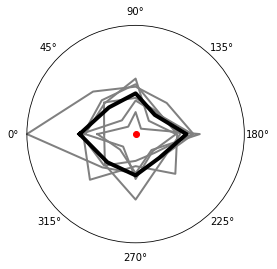

There are 17 experiments for  VISl [175, 250, 275] ['Vip-IRES-Cre']
Processing experiment 662982346
In this experiment, we have 27 cells, but after filtering, we have 0 cells
In this experiment, we have 27 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 686449092
In this experiment, we have 25 cells, but after filtering, we have 0 cells
In this experiment, we have 25 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 614556106
In this experiment, we have 9 cells, but after filtering, we have 3 cells
In this experiment, we have 9 cells, but after filtering and removing negative mean dffs, we have 3 cells
Processing experiment 576273468
In this experiment, we have 21 cells, but after filtering, we have 1 cells
In this experiment, we have 21 cells, but after filtering and removing negative mean dffs, we have 1 cells
Processing experiment 657009581
In this experiment, we have 13 cells, but afte

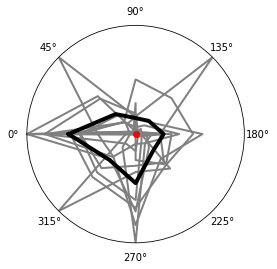

There are 8 experiments for  VISl [250, 275] ['Sst-IRES-Cre']
Processing experiment 581153070
In this experiment, we have 32 cells, but after filtering, we have 2 cells
In this experiment, we have 32 cells, but after filtering and removing negative mean dffs, we have 2 cells
Processing experiment 596509886
In this experiment, we have 20 cells, but after filtering, we have 4 cells
In this experiment, we have 20 cells, but after filtering and removing negative mean dffs, we have 4 cells
Processing experiment 686442556
In this experiment, we have 24 cells, but after filtering, we have 4 cells
In this experiment, we have 24 cells, but after filtering and removing negative mean dffs, we have 4 cells
Processing experiment 580095655
In this experiment, we have 22 cells, but after filtering, we have 4 cells
In this experiment, we have 22 cells, but after filtering and removing negative mean dffs, we have 4 cells
Processing experiment 582867147
In this experiment, we have 11 cells, but after fi

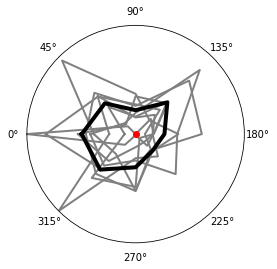

There are 7 experiments for  VISl [375] ['Sst-IRES-Cre']
Processing experiment 601886540
In this experiment, we have 8 cells, but after filtering, we have 2 cells
In this experiment, we have 8 cells, but after filtering and removing negative mean dffs, we have 2 cells
Processing experiment 612549085
In this experiment, we have 25 cells, but after filtering, we have 0 cells
In this experiment, we have 25 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 623339221
In this experiment, we have 27 cells, but after filtering, we have 1 cells
In this experiment, we have 27 cells, but after filtering and removing negative mean dffs, we have 1 cells
Processing experiment 584544569
In this experiment, we have 18 cells, but after filtering, we have 2 cells
In this experiment, we have 18 cells, but after filtering and removing negative mean dffs, we have 2 cells
Processing experiment 601805379
In this experiment, we have 28 cells, but after filtering

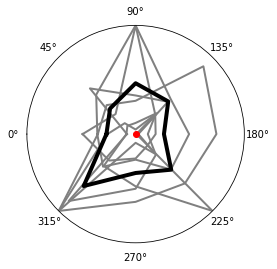

There are 16 experiments for  VISpm [175] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']
Processing experiment 653126877
In this experiment, we have 134 cells, but after filtering, we have 8 cells
In this experiment, we have 134 cells, but after filtering and removing negative mean dffs, we have 8 cells
Processing experiment 575135986
In this experiment, we have 229 cells, but after filtering, we have 18 cells
In this experiment, we have 229 cells, but after filtering and removing negative mean dffs, we have 18 cells
Processing experiment 504115289
In this experiment, we have 146 cells, but after filtering, we have 9 cells
In this experiment, we have 146 cells, but after filtering and removing negative mean dffs, we have 9 cells
Processing experiment 502666254
In this experiment, we have 139 cells, but after filtering, we have 8 cells
In this experiment, we have 139 cells, but after filtering and removing negative mean dffs, we have 8 cells
Processing experiment 651770794
In th

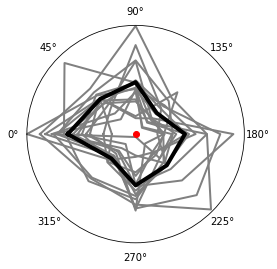

There are 23 experiments for  VISpm [275, 300, 325, 335, 350] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']
Processing experiment 551888519
In this experiment, we have 250 cells, but after filtering, we have 40 cells
In this experiment, we have 250 cells, but after filtering and removing negative mean dffs, we have 40 cells
Processing experiment 662359728
In this experiment, we have 127 cells, but after filtering, we have 17 cells
In this experiment, we have 127 cells, but after filtering and removing negative mean dffs, we have 17 cells
Processing experiment 557615965
In this experiment, we have 23 cells, but after filtering, we have 0 cells
In this experiment, we have 23 cells, but after filtering and removing negative mean dffs, we have 0 cells
Processing experiment 569896493
In this experiment, we have 59 cells, but after filtering, we have 9 cells
In this experiment, we have 59 cells, but after filtering and removing negative mean dffs, we h

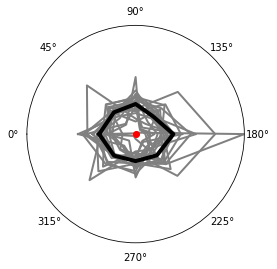

There are 3 experiments for  VISpm [550] ['Ntsr1-Cre_GN220']
Processing experiment 637126541
In this experiment, we have 28 cells, but after filtering, we have 5 cells
In this experiment, we have 28 cells, but after filtering and removing negative mean dffs, we have 5 cells
Processing experiment 604529230
In this experiment, we have 143 cells, but after filtering, we have 18 cells
In this experiment, we have 143 cells, but after filtering and removing negative mean dffs, we have 18 cells
Processing experiment 647595671
In this experiment, we have 159 cells, but after filtering, we have 13 cells
In this experiment, we have 159 cells, but after filtering and removing negative mean dffs, we have 13 cells
VISpm [550] ['Ntsr1-Cre_GN220'] #Experiments:  3 #Cells: 36


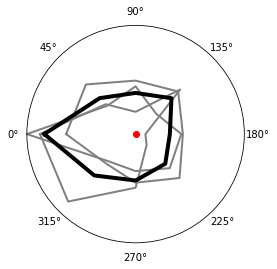

There are 16 experiments for  VISpm [175, 275] ['Vip-IRES-Cre']
Processing experiment 626027944
In this experiment, we have 10 cells, but after filtering, we have 3 cells
In this experiment, we have 10 cells, but after filtering and removing negative mean dffs, we have 3 cells
Processing experiment 649324898
In this experiment, we have 16 cells, but after filtering, we have 5 cells
In this experiment, we have 16 cells, but after filtering and removing negative mean dffs, we have 5 cells
Processing experiment 692345336
In this experiment, we have 35 cells, but after filtering, we have 1 cells
In this experiment, we have 35 cells, but after filtering and removing negative mean dffs, we have 1 cells
Processing experiment 647598519
In this experiment, we have 20 cells, but after filtering, we have 7 cells
In this experiment, we have 20 cells, but after filtering and removing negative mean dffs, we have 7 cells
Processing experiment 696156783
In this experiment, we have 37 cells, but after 

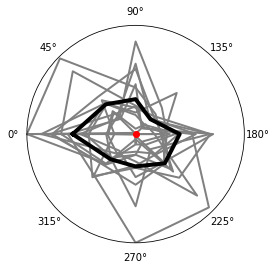

There are 14 experiments for  VISpm [275, 300, 325, 350, 375] ['Sst-IRES-Cre']
Processing experiment 603763073
In this experiment, we have 27 cells, but after filtering, we have 3 cells
In this experiment, we have 27 cells, but after filtering and removing negative mean dffs, we have 3 cells
Processing experiment 639117196
In this experiment, we have 13 cells, but after filtering, we have 1 cells
In this experiment, we have 13 cells, but after filtering and removing negative mean dffs, we have 1 cells
Processing experiment 639251932
In this experiment, we have 20 cells, but after filtering, we have 5 cells
In this experiment, we have 20 cells, but after filtering and removing negative mean dffs, we have 5 cells
Processing experiment 599909878
In this experiment, we have 19 cells, but after filtering, we have 3 cells
In this experiment, we have 19 cells, but after filtering and removing negative mean dffs, we have 3 cells
Processing experiment 603188560
In this experiment, we have 11 ce

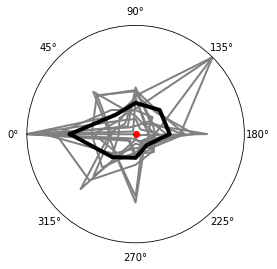

There are 11 experiments for  VISrl [175] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']
Processing experiment 581597734
In this experiment, we have 297 cells, but after filtering, we have 8 cells
In this experiment, we have 297 cells, but after filtering and removing negative mean dffs, we have 8 cells
Processing experiment 574823092
In this experiment, we have 215 cells, but after filtering, we have 3 cells
In this experiment, we have 215 cells, but after filtering and removing negative mean dffs, we have 3 cells
Processing experiment 580095647
In this experiment, we have 294 cells, but after filtering, we have 12 cells
In this experiment, we have 294 cells, but after filtering and removing negative mean dffs, we have 12 cells
Processing experiment 571541565
In this experiment, we have 138 cells, but after filtering, we have 1 cells
In this experiment, we have 138 cells, but after filtering and removing negative mean dffs, we have 1 cells
Processing experiment 698260532
In th

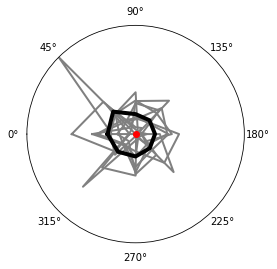

There are 21 experiments for  VISrl [275, 350] ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Rorb-IRES2-Cre', 'Nr5a1-Cre']
Processing experiment 571006300
In this experiment, we have 304 cells, but after filtering, we have 46 cells
In this experiment, we have 304 cells, but after filtering and removing negative mean dffs, we have 46 cells
Processing experiment 593270603
In this experiment, we have 373 cells, but after filtering, we have 55 cells
In this experiment, we have 373 cells, but after filtering and removing negative mean dffs, we have 55 cells
Processing experiment 637154333
In this experiment, we have 56 cells, but after filtering, we have 1 cells
In this experiment, we have 56 cells, but after filtering and removing negative mean dffs, we have 1 cells
Processing experiment 640198011
In this experiment, we have 369 cells, but after filtering, we have 13 cells
In this experiment, we have 369 cells, but after filtering and removing negative mean dffs, we have 13 cells
Processing experimen

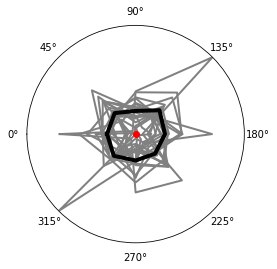

There are 2 experiments for  VISrl [375] ['Rbp4-Cre_KL100 ', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre']
Processing experiment 582838758
In this experiment, we have 415 cells, but after filtering, we have 1 cells
In this experiment, we have 415 cells, but after filtering and removing negative mean dffs, we have 1 cells
Processing experiment 604328043
In this experiment, we have 72 cells, but after filtering, we have 9 cells
In this experiment, we have 72 cells, but after filtering and removing negative mean dffs, we have 9 cells
VISrl [375] ['Rbp4-Cre_KL100 ', 'Emx1-IRES-Cre', 'Slc17a7-IRES2-Cre'] #Experiments:  2 #Cells: 10


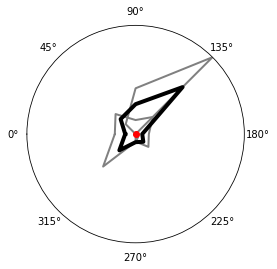

There are 1 experiments for  VISrl [375] ['Sst-IRES-Cre']
Processing experiment 589755795
In this experiment, we have 9 cells, but after filtering, we have 2 cells
In this experiment, we have 9 cells, but after filtering and removing negative mean dffs, we have 2 cells
VISrl [375] ['Sst-IRES-Cre'] #Experiments:  1 #Cells: 2


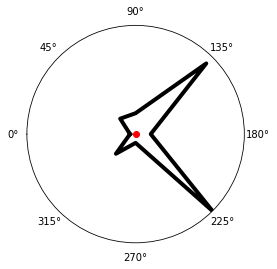

In [6]:
import warnings; warnings.simplefilter('ignore');
for targeted_structure, imaging_depths, cre_lines in interesting_categories:
    agg_theta, agg_r, thetas, rs, num_cells = get_one_category_polar_data(
        boc,
        targeted_structure,
        imaging_depths,
        cre_lines)
    if agg_theta is None:
        continue
    print(targeted_structure, imaging_depths, cre_lines, "#Experiments: ", len(thetas), "#Cells:", num_cells)
    max_r = max(np.array(agg_r).max(), np.array(rs).max())

    agg_r_np = np.array(agg_r)
    agg_r_np = agg_r_np / max_r
    rs_np = np.array(rs)
    rs_np = rs_np / max_r
    fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
    polar_plot_population(ax=ax,
        bold_theta = agg_theta,
        bold_r = agg_r_np,
        grey_thetas = thetas, 
        grey_rs = rs_np)
    plt.show()
    filename = "{}_cell{}_exp{}_depths{}_crelines{}".format(
        targeted_structure,
        num_cells,
        len(thetas),
        imaging_depths,
        cre_lines)
    fig.savefig('../results/autopics/{}.png'.format(filename))